<a href="https://colab.research.google.com/github/TheGreemDark/LR_ML/blob/main/LR2_ML_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import библиотек

In [ ]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import pandas as pd # Библиотека Pandas для работы с табличными данными

import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"
import plotly.express as px # Библиотека Plotly. Модуль "Express"
from google.colab import files  # чтобы загружать файлы в облако через проводник

In [ ]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"
import plotly.express as px # Библиотека Plotly. Модуль "Express"

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Генерация данных

Создание одномерных данных, которые могут быть некоторыми функциями от входных данных `X`.

Чтобы не иметь всегда `100%` необходимо добавить шумы к данным.

Так будет иметься как истинный вариант зависимости, так и зашумленный.

Созданные данные могут быть как линейными, `f = None`, так и  гармоническими (`np.sin, np.cos`) или экспонециальными `np.exp`

In [ ]:
def true_fun(x, a=np.pi, b = 0, f=np.cos): #данные выбраны гармонические np.cos
    """Генерация произвольной зависимости
    Входные переменные:
    ===========
    x: массив данных из которых будет генерироваться зависимость
    a: коэффициент на который входные данные будут умножаться
    если а - список, то это коэффициенты в полиномиальной зависимости
    так, а = [1,2,3] позволит сгенерировать зависимость вида 1*x+ 2*x^2 +3*x^3
    b: коэффициент который будет добавлен к данным (постоянная прибавочка)
    f: функция которая будет применена к зависимости. Можно задать списком. Тогда это будут разные колонки
    """
    x = np.atleast_1d(x)[:] # убеждаемся что данные - одномерный массив
    a = np.atleast_1d(a)

    if f is None: f = lambda x:x # если функция не задана (None) то ничего не происходит
    x = np.sum([ai*np.power(x, i+1) for i,ai in enumerate(a)],axis=0) # домножаем входные данные на коэффициенты (и если надо возводим в степень)

    return f(x/2 + 1/(x+5)+b) # функция, отличная от примера

def noises(shape , noise_power):
    """Генерация случайного шума
    Входные переменные:
    ===========
    shape: размерность массива данных
    noise_power: коэффициент ~ сила шума
    """
    return np.random.randn(*shape) *noise_power # библиотека numpy может генерировать случайные числа.
                                                # в данном случае - нормальное распределение (среднее = 0, стандартное отклонение = 1 )

def dataset(a, b, f = np.cos,  N = 250, x_max =1, noise_power = 0, random_x = True,  seed = 42):
    """Генерация набора данных
    Входные переменные:
    ===========
    a: коэффициент на который входные данные будут умножаться
    если а - список, то это коэффициенты в полиномиальной зависимости
    так, а = [1,2,3] позволит сгенерировать зависимость вида 1*x+ 2*x^2 +3*x^3
    b: коэффициент который будет добавлен к данным (постоянная прибавочка)
    f: функция которая будет применена к зависимости. Можно задать списком. Тогда это будут разные колонки
    N: количество точек данных
    x_max: максимальное значение данных
    noise_power: коэффициент ~ сила шума
    random_x: как будут распределены данные (линейно, или случайно)
    seed: фиксированный сид случайных чисел (для повторяемости)
    """

    np.random.seed(seed) # фиксируем случайный seed

    if random_x:# если мы хотим случайно распределить данные
        x = np.sort(np.random.rand(N))*x_max # то x будет N случайных числе из диапазона от 0 до x_max
    else: # иначе
        x = np.linspace(0,x_max,N) # х это равномерно распределенные N чисел из диапазона от 0 до x_max

    y_true = np.array([]) # создаем пустой массив который будет "наполнять" зависимостями

    for f_ in np.append([], f): # если f - задана списком, то мы учтем все варианты
        y_true=np.append(y_true, true_fun(x, a, b, f_)) # применяем описанную выше функцию true_fun

    y_true = y_true.reshape(-1,N).T
    y = y_true + noises(y_true.shape , noise_power) # добавляем шум

    return y, y_true, np.atleast_2d(x).T # возвращаем зашумленные значения зависимостей, зависимости без шума, и массив входных данных

Визуализация получившихся данных

In [ ]:
def vis_data(y, y_true,x, title):
    """Визуализация полученного набора данных
    Входные переменные:
    ===========
    y: зашумленные значения зависимостей
    y_true: зависимости без шума
    x: массив входных данных
    title: общий заголовок
    """
    fig  = plt.figure(figsize=(14,8))# создаем "полотно", на котором будем "рисовать" график
    # рисуем с помощью библиотеки matplotlib
    plt.scatter(x[:,0], # какую переменную используем для горизонтальной оси - массив данных х
                y, # какую переменную используем для вертикальной оси - зашумленные значения зависимостей
                edgecolor='b', #  цвет маркера
                label="Зашумленные данные", # название зависимости, которое будет отображено в легенде
                s=196, # квадрат радиуса
                alpha = 0.6) # прозрачность
    plt.scatter(x[:,0], y_true,label="Реальные данные", s=81,c='g', alpha = 0.8) # аналогично вышеописанному, только для зависимости без шума
                                                                                # и с другими параметрами маркеров (цвет, размер, прозрачность, название)
    plt.grid() # чтобы была сетка
    plt.xlabel('x',fontsize=35) # название горизонтальной оси
    plt.ylabel('y',fontsize=35) # название вертикальной оси
    plt.legend(fontsize=25) # чтобы была легенда
    plt.title(title, fontsize=25 ) # заголовок
    plt.xticks(fontsize = 25) # чтобы промежуточные значения горизонтальной оси были не маленькими
    plt.yticks(fontsize = 25);# чтобы промежуточные значения вертикальной оси были не маленькими
    plt.tight_layout() # чтобы полотно было без пустого пространство

In [ ]:
def vis_data_plotly(y, y_true,x, title):
    """Визуализация полученного набора данных с помощью библиотеки plotly
    Входные переменные:
    ===========
    y: зашумленные значения зависимостей
    y_true: зависимости без шума
    x: массив входных данных
    title: общий заголовок
    """
    fig = go.Figure()
    # рисуем с помощью библиотеки plotly
    fig.add_trace(
        go.Scatter(
        x=x[:,0],
        y=y_true[:,0],
        mode='lines+markers',
        name='Реальные данные',
        marker=dict(size = 10,
                    color='Green')
        )
    )
    fig.add_trace(
        go.Scatter(
        x=x[:,0],
        y=y[:,0],
        mode='markers',
        name='Зашумленные данные',
        opacity=0.5,
        marker=dict(size = 15,
                    color='LightSkyBlue',
                    line=dict(
                        color='Blue',
                        width=3
            )),

        )
    )
    fig.update_layout(
            title=title,
            width=1200,
            height=600,
        template = "plotly_dark"
            )

    fig.show()

**Нелинейная зависимость**

Применяем описанные выше функции для генерации нелинейной зависимости вида

`y = 3*(x/2 + 1/(x + 5)) + 2`, где `х` изменяется в диапазоне от `0` до `1`, в `х` - `100` точек, "мощность" шума `0.1`

Запускается функция `dataset` с нужными параметрами

*   `a = 3` (на это число домножится `x/2 + 1/(x + 5)`)
*  ` b = 2 `(это число добавится к `x/2 + 1/(x + 5)`)
*   `f = np.cos` (чтобы была другая гармоническая зависимость)
*   `N = 100` (число точек)
*   `x_max = 1` (максимальное значение `х`)
*   `noise_power = 0.1` (мощность шума)
*   `seed = 42` (фиксированный сид случайных чисел)
                       

Далее визуализируются данные с помощью функции `vis_data`

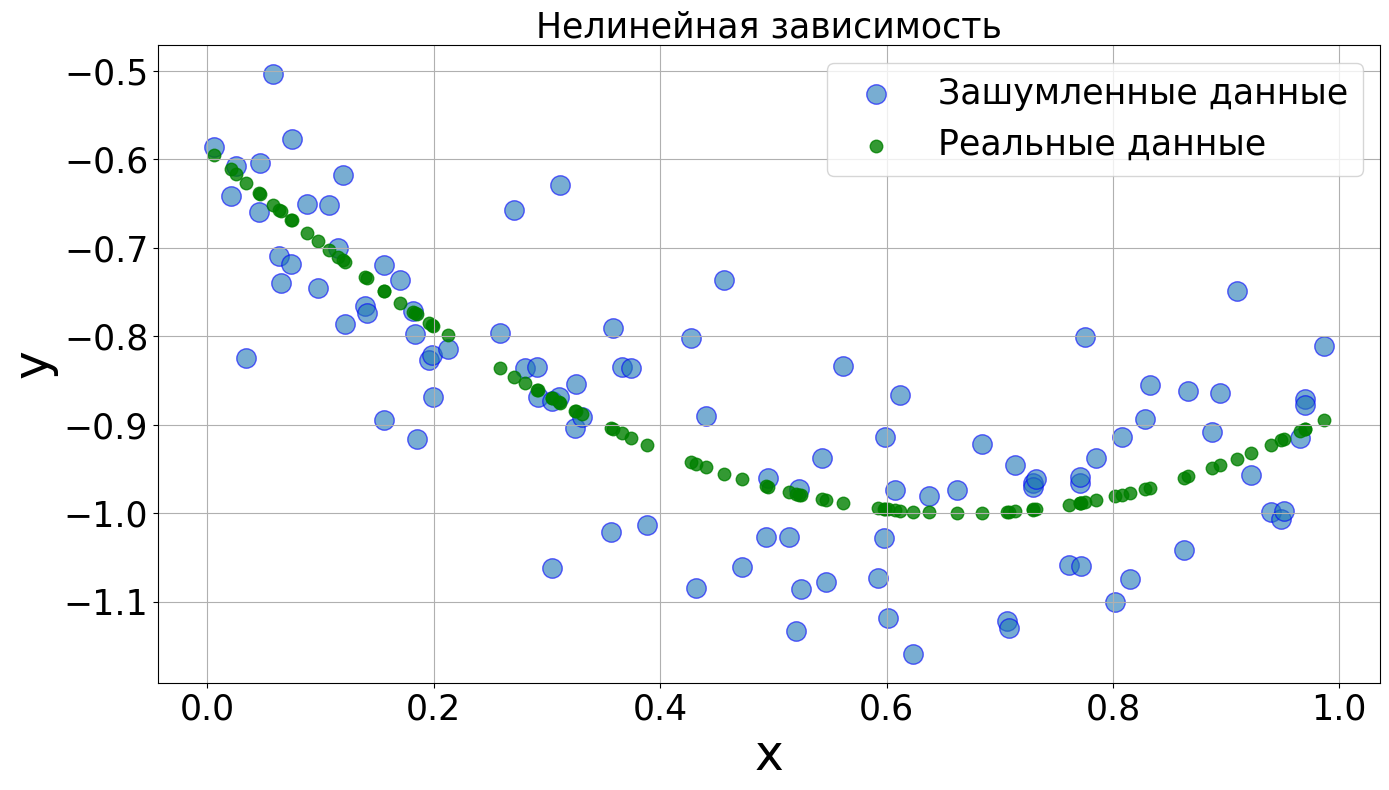

In [ ]:
y, y_true, x = dataset(a = 3, b = 2,
                       f = np.cos,  N = 100,
                       x_max = 1,
                       noise_power = 0.1,
                       seed = 42)
vis_data(y, y_true,x, 'Нелинейная зависимость')

Визуально можно заключить, что модель реальных данных хорошо описывает основную тенденцию, несмотря на шум, присутствующий в измерениях или данных.

# Модель линейной регрессии

## Тренировочная и тестовая выборка

Для того, чтобы выделить из входных данных тренировочную и тестовую выборку необходимо записать следующую функцию.

Функция будет иметь следующие входные аргументы:
* `x,y` - входные данные и метки;
* `train_size` - размер тренировочной части;
* `test_size`  - размер тестовой части;
* `random_state` - состояние генератора случайных чисел;
* `shuffle` - необходимость перемешивания данных.

In [ ]:
def train_test_split(x,y, train_size=None, test_size=None, random_state=42, shuffle=True,):
    """Разбиение данных на тренировочную-валидационную-тестовую
    Входные переменные:
    ===========
    x: матрица признаков
    y: вектор целевых меток
    train_size: размер тренировочной выборки (в долях или в штуках)
    test_size: размер тестовой выборки (в долях или в штуках)
    random_state: фиксированный сид случайных чисел (для повторяемости)
    shuffle: перемешиваем ли мы выборку или нет
    """
    if random_state: np.random.seed(random_state) # фиксируем случайный seed

    size = y.shape[0] # считаем сколько у нас точек
    idxs = np.arange(size) # массив индексов от 0 до количества точек
    if shuffle: np.random.shuffle(idxs) # если перемешиваем - то перемешиваем

    # если задаем test_size, но не задаем train_size
    if test_size and train_size is None:
        # тогда нам надо посчитать train_size
        # если размер задали в долях
        if (test_size<= 1):  train_size = 1 - test_size
        # если размер задали в штуках
        else:  train_size = size - test_size
        test_size = None    # обнулим переменную, чтобы потом не сломалось


    # если задаем train_size, но не задаем test_size, или мы некорректно задали размер  train_size
    if train_size is None or train_size > size: train_size = size

    # если задаем train_size
    if (train_size<= 1): train_size *= size

    # если test_size не обнулилось
    if test_size is not None:
        # если размер задали в долях
        if test_size<= 1: test_size *= size
        # если размер задали в штуках
        if test_size>size: test_size = size-train_size
    else: test_size = 0 # если обнулилось - то обнулилось)

    # разбиваем выборку на тренировочную и валидационную.
    # в тренировочную берем индексы от 0 до train_size
    x_train, y_train = x[idxs[:int(train_size)]], y[idxs[:int(train_size)]]
    # в валидационную берем индексы от train_size до size - test_size
    x_val,   y_val   = x[idxs[int(train_size):size - int(test_size)]], y[idxs[int(train_size):size - int(test_size)]]

    # если test_size всё еще не обнулилось
    if test_size > 0:
        # в тестовую берем индексы от size - test_size до конца
        x_test, y_test = x[idxs[size - int(test_size):]], y[idxs[size - int(test_size):]]
        # возвращаем тренировочную, валидационную и тестовую часть (сначала признаки, потом целевые метки)
        return x_train,  x_val, x_test, y_train.squeeze(), y_val.squeeze(), y_test.squeeze()
    # возвращаем тренировочную и валидационную  (сначала признаки, потом целевые метки)
    return x_train, x_val, y_train.squeeze(), y_val.squeeze()

# пример использования, если хотим разбить на 3 части
x_train, x_val, x_test, y_train, y_val, y_test = train_test_split(x, y, train_size = 0.5, test_size=0.3, )
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape,  x_test.shape, y_test.shape )

# пример использования, если хотим разбить на 2 части
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.3, )
print(x_train.shape, y_train.shape,  x_test.shape, y_test.shape )

(50, 1) (50,) (20, 1) (20,) (30, 1) (30,)
(70, 1) (70,) (30, 1) (30,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.3, shuffle = True)
print(x_train.shape, y_train.shape,  x_test.shape, y_test.shape )

(70, 1) (70,) (30, 1) (30,)


In [ ]:
def plot_train_test_data(x_train, y_train, x_test, y_test):
    """Отрисовка тестовых и тренировочных данных.
    Входные переменные:
    ===========
    x_train: признаки на которых тренировались
    y_train: тренировочные целевые значения
    x_test: тестовые признаки
    y_test: тестовые целевые значения
    """

    fig = go.Figure()
    # рисуем с помощью библиотеки plotly
    fig.add_trace(
        go.Scatter(
        x=x_train[:,0],
        y=y_train,
        mode='markers',
        name='Тренировочные данные',
        marker=dict(size = 10,
                    color='Green')
        )
    )
    fig.add_trace(
        go.Scatter(
        x=x_test[:,0],
        y=y_test,
        mode='markers',
        name='Тестовые данные',
        marker=dict(size = 15,
                    color='LightSkyBlue',
                    line=dict(
                        color='Red',
                        width=3
            )),

        )
    )
    fig.update_layout(
            title='Тренировочные и тестовые данные',
            width=1200,
            height=600,
        template = "plotly_dark"
            )

    fig.show()

In [ ]:
plot_train_test_data(x_train, y_train, x_test, y_test)

График демонстрирует, что тестовые данные хорошо охватывают тренировочную область, что важно для надёжной оценки модели. Явных проблем с несоответствием распределений или выбросами не наблюдается.

## Инициализация весов

In [ ]:
def init_weights(W_shape, add_bias = True, random_state = 42):
    """Генерация весов
    Входные переменные:
    ===========
    W_shape: сколько весов надо (количество признаков)
    add_bias: учитываем смещение или нет
    random_state: фиксированный сид случайных чисел (для повторяемости)
    """
    W_shape = np.atleast_1d(W_shape) # убеждаемся что данные - одномерный массив
    if random_state:  # фиксируем случайный seed
        np.random.seed(random_state)
    W = np.random.randn(*list(W_shape))/np.sqrt(np.sum(W_shape))   # генерируем случайные числа с нулевым средним и дисперсией как корень из размерности весов
    if add_bias: # если учитываем смещение
        W = np.hstack((0,W )) # добавляем 0 в наш вектор весов
    return W.squeeze()

Далее запустим функцию для разных значений длин вектора весов.

In [ ]:
init_weights(1)

array([0.        , 0.49671415])

In [ ]:
init_weights(3)

array([ 0.        ,  0.28677805, -0.07982693,  0.37394315])

In [ ]:
init_weights(6)

array([ 0.        ,  0.2027827 , -0.05644616,  0.26441774,  0.62177434,
       -0.09559271, -0.09558601])

In [ ]:
init_weights(10)

array([ 0.        ,  0.15707481, -0.04372301,  0.2048171 ,  0.48162433,
       -0.0740458 , -0.07404061,  0.49939094,  0.24268417, -0.14846084,
        0.17157255])

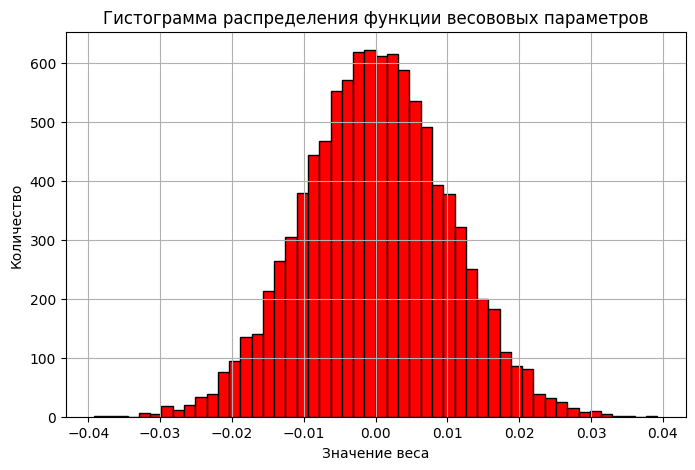

In [ ]:
# Генерация большого количества весов, например 10000
weights = init_weights(10000)

# Визуализация гистограммы
plt.figure(figsize=(8,5))
plt.hist(weights, bins=50, color='red', edgecolor='black')
plt.title('Гистограмма распределения функции весововых параметров')
plt.xlabel('Значение веса')
plt.ylabel('Количество')
plt.grid(True)
plt.show()


- Функции весовых параметров сгенерированы с использованием нормального распределения с нулевым средним и дисперсией, скорректированной на размерность весов (деление на корень суммы размерностей).
- Из-за этого веса имеют форму нормального распределения (колоколообразная кривая), центрированную около нуля.
- Добавлен элемент смещения (0) в начале массива, он обычно выделяется отдельным значением, но при большом числе весов не влияет на общую форму распределения.

## Предсказание

Запишем функции предсказания и расчета значений функции потерь.

 Отметим, что для учета смещения будет добавляться единичный столбец к входным данным.

In [ ]:
def predict( X, W, add_bias = True):
    """Предсказание линейной модели
    Входные переменные:
    ===========
    X: признаки
    W: вектор весов
    add_bias: учитываем смещение или нет
    """
    if add_bias: # если учитываем смещение
        X_full = np.column_stack((np.ones(X.shape[0]),X)) # добавляем единички по количеству точек данных
    else:
        X_full = X # иначе ничего не делаем
    return  np.dot(X_full,W) # предсказание как матричное перемножение признаков на веса

Проверка правильности работы функции.

Зададим веса и значение признака.

In [ ]:
w = np.array([-5, 2])
x_ = np.array([0,1,2,5])

Проверим, что всё будет работать корректно на двумерном массиве

Для этого:
1. добавим еще 1 значение в вектор весов
2. по другому определим признаки

In [ ]:
w = init_weights(2)
w

array([ 0.        ,  0.35122995, -0.09776762])

In [ ]:
x_ = np.random.randn(5,2)
x_

array([[ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473],
       [-0.46947439,  0.54256004],
       [-0.46341769, -0.46572975]])

In [ ]:
predict( x_, w )

array([ 0.0785846 , -0.05935066,  0.47963656, -0.21793827, -0.11723288])

Реализация предсказания модели на трех мерном массиве

In [ ]:
def predict_3d(X, W, add_bias=True):
    """
    Предсказание для линейной модели на 3-мерном массиве.

    Вход:
    X - ndarray с размерностью (N, M, K), где
        N - количество объектов (примеров),
        M и K - признаки,
    W - вектор весов длиной M*K (+1, если add_bias=True),
    add_bias - учитывать ли смещение, по умолчанию True.

    Выход:
    ndarray с предсказаниями для каждого из N объектов.
    """
    assert X.ndim == 3, "Входной массив должен быть трехмерным"

    N = X.shape[0]
    # Преобразуем каждый объект в вектор признаков
    X_full = X.reshape(N, -1)

    if add_bias:
        # Добавляем столбец единиц для смещения
        X_full = np.column_stack((np.ones(N), X_full))

    W_flat = W.reshape(-1)

    # Проверяем, что длина весов соответствует числу признаков + bias
    assert W_flat.shape[0] == X_full.shape[1], "Размер весов не соответствует размеру признаков"

    # Предсказание как матричное умножение
    y_pred = np.dot(X_full, W_flat)

    return y_pred

# Пример использования
X_3d = np.random.randn(5, 2, 3)  # 5 объектов, каждый с 2x3 признаками
W_3d = np.random.randn(2*3 + 1)  # веса с учётом смещения

preds = predict_3d(X_3d, W_3d)
print(preds)

[ 3.17830129  0.87666177 -0.19543895 -1.72614136  4.42381732]


- Реализуется 3-мерный массив.
- Сворачивание всех признаков во второй и третьей оси в единый вектор.
- Добавление единиц для смещения (если add_bias=True).
- Проверка согласованности размеров весов и признаков.
- Возвращается одномерный массив предсказаний для каждого объекта.

## Функция потерь

In [ ]:
def loss_func(yhat, y):
    """функция потерь
    Входные переменные:
    ===========
    yhat: предсказание модели
    y: реальные значения
    """
    return np.square(yhat - y)
    # функция потерь как квадрат разности предсказаний и реальных значений

Проведем проверку функции потерь на большом диапазоне данных

Посмотрим на график того как меняется функция потерь в зависимости от отклонения (мультипликативного) оценки результата от его истинного значения.

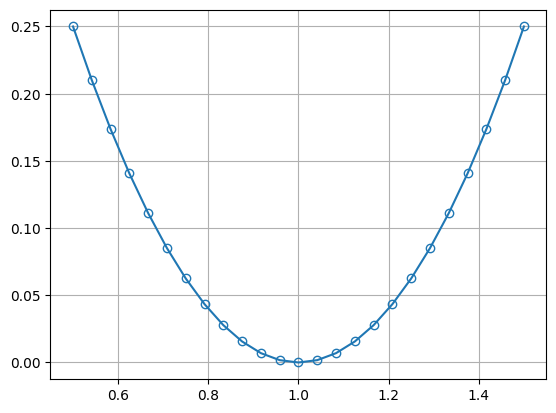

In [ ]:
decline = np.linspace(start = 0.5, stop = 1.5,num = 25) # созданим вектор "пропорций" от 50% до 150%
yhat = decline* 1 # на примере 1 точке
loss = loss_func(yhat, 1) # посчитаем функцию потерь
plt.plot(decline,loss,'-o', mfc = 'none'); plt.grid();  # визуализируем

Получается парабола и чем дальше от исходной точки - тем больше

## Градиент функции потерь

In [ ]:
def grad_loss(y_hat, y, X, add_bias = True):
    """Оценим градиент функции потерь
    Входные переменные:
    ===========
    yhat: предсказание модели
    y: реальные значения
    X: признаки
    add_bias: учитываем смещение или нет
    """
    if add_bias: # если учитываем смещение
        X_full = np.column_stack((np.ones(X.shape[0]),X)) # добавляем единички по количеству точек данных
    else:
        X_full = X # иначе ничего не делаем

    return 2*np.dot(X_full.T, (y_hat - y)) / y.size  # градиент функции потерь как среднее от матричного умножения признаков на разницу предсказание-реальное

Проведем расчет градиента ошибки

Если предсказание меньше реального значения, то градиент будет отрицательный

In [ ]:
grad_loss(np.array([1]), # предсказание
          np.array([2]), # реальное значение
          np.array([2])  # признак
          )

array([-2., -4.])

Если предсказание меньше реального значения, то градиент будет положительный

In [ ]:
grad_loss(np.array([2]), # предсказание
          np.array([1]), # реальное значение
          np.array([2])  # признак
          )

array([2., 4.])

Зависит от того каких отклонений больше у градиента

In [ ]:
grad_loss(np.array([2, 1.5]),# предсказание
          np.array([1, 2]),  # реальное значение
          np.array([0.5, 3])   # признак
          )

array([ 0.5, -1. ])

Градиент положительный

In [ ]:
grad_loss(np.array([2, 3]),# предсказание
          np.array([0, 2]),  # реальное значение
          np.array([0.5, 1])   # признак
          )

array([3., 2.])

## Обновление весов

In [ ]:
def update_weights(grad, W, learning_rate):
    """Обновим веса
    Входные переменные:
    ===========
    grad: значение градиента
    W: веса
    learning_rate: скорость обучения
    """
    return W - learning_rate*grad # просто из старых весов вычитаем градиент помноженный на скорость обучения

Протестируем полученные веса

In [ ]:
update_weights(np.array([6]), # градиент
               np.array([12]), # текущие веса
               0.5)

array([9.])

В зависимости от знака градиента будут или увеличиваться, или уменьшаться веса

In [ ]:
update_weights(np.array([7, -7]), # градиент
               np.array([15, 15]), # текущие веса
               0.1)

array([14.3, 15.7])

Протестируем функции вместе на "реальных" данных

In [ ]:
weights = init_weights(x_train.shape[1]) # генерируем веса
yhat = predict( x_train[0],weights) # делаем предсказание на 1 точке
loss = loss_func(yhat, y_train[0]) # посчитаем функцию потерь

print(f'Веса {weights}')

print(f'Первая точка-признак {x_train[0]},\n Предсказание {yhat},\n Реальное значение {y_train[0]},\n Функция потерь: {loss}')

grad = grad_loss(yhat, y_train[0], x_train[0]) # делаем оценку градиента функции потерь

print(f'Градиент {grad}')

# теперь проведем обновление весовых параметров
laerning_rate = 0.1
weights = update_weights(grad, weights, laerning_rate)

print('После обновления')

yhat = predict( x_train[0],weights)
loss = loss_func(yhat, y_train[0])

print(f'Веса {weights}')

print(f'Первая точка-признак {x_train[0]},\n Предсказание {yhat},\n Реальное значение {y_train[0]},\n Функция потерь: {loss}')

Веса [0.         0.49671415]
Первая точка-признак [0.80839735],
 Предсказание [0.4015424],
 Реальное значение -0.913266967572303,
 Функция потерь: [1.72872368]
Градиент [2.62961874 2.12577682]
После обновления
Веса [-0.26296187  0.28413647]
Первая точка-признак [0.80839735],
 Предсказание [-0.0332667],
 Реальное значение -0.913266967572303,
 Функция потерь: [0.77440046]


Функция потерь уменьшается, то есть теория в целом пока работает

Необходимо подготовить функцию

## Сбор градиентного спуска для регрессии в одну функцию

In [ ]:
def fit(X, y, learning_rate, weights = None,  epochs=30):
    """Обучение модели.
    Входные переменные:
    ===========
    X: признаки
    y: реальные значения
    learning_rate: скорость обучения
    weights: веса
    epochs: количество эпох обучения
    """

    if weights is None: weights = init_weights(X.shape[1]) # если веса не заданы - генерируем веса случайно
    # если хотим продолжать обучение

    cost = np.zeros(epochs) # создадим массив из нулей

    for i in range(epochs): # цикл по количеству эпох
    # на каждом шаге
        yhat    = predict(X,weights) # делаем предсказание
        grad    = grad_loss(yhat,  y, X)  # считаем производную функции потерь
        weights = update_weights(grad, weights, learning_rate)  # обновляем веса
        cost[i] = loss_func(yhat,  y).mean() # фиксируем среднее значение функции потерь. на память. потому что можем

    return weights, cost # возвращаем итоговые веса (после epochs шагов обновлений) и график функции потерь. потому что нам интересно

Протестируем обучение

In [ ]:
weights, cost = fit(x_train, y_train, learning_rate=0.05, epochs=200)

In [ ]:
def plot_cost(cost):
    """Отрисовка функции потерь.
    Входные переменные:
    ===========
    cost: функция потерь
    """
    fig = go.Figure()
        # рисуем с помощью библиотеки plotly
    fig.add_trace(
            go.Scatter(
            y=cost,
            mode='lines+markers',
            name='Реальные данные',

            )
        )
    fig.update_layout(
                title="Кривая обучения",
                width=1200,
                height=600,
            template = "plotly_dark"
                )

    fig.show()

In [ ]:
plot_cost(cost);

- Ошибка быстро уменьшается с первых эпох — модель успешно обучается и быстро подстраивается под данные.
- Значение ошибки близко к нулю к концу обучения — это говорит о хорошей сходимости модели и низкой ошибке на обучающей выборке.
- Отсутствует переобучение — если бы ошибка на обучении была очень низкой, а на валидации высокой, это указывало бы на переобучение. На графике показана только кривая ошибки, но резкое снижение и стабилизация указывает на адекватное обучение.

## Коэффициент детерминации

In [ ]:
def r2_score(yhat, y):
    """Расчет коэффициента детерминации.
    Входные переменные:
    ===========
    yhat: предсказание модели
    y: реальные значения
    """
    return 1-(np.square(y-yhat)).sum(axis=0)/(np.square(y-np.mean(y, axis=0))).sum(axis=0)

In [ ]:
predicts = predict( x_test,weights,)

r2_score(predicts, y_test), r2_score(predict(x_train,weights, ), y_train)

(np.float64(0.342348247661899), np.float64(0.33840908700870986))

Посмотрим на то, какая интерпретация может быть у предсказанных и заданных данных.

In [ ]:
def plot_model_weights(x_train, y_train, x_test, x, y, weights):
    """Отрисовка модели.
    Входные переменные:
    ===========
    x_train: признаки на которых тренировались
    y_train: тренировочные целевые значения
    x_test: тестовые признаки
    x: полные признаки
    y: реальные целевые значения (без шума)
    weights: веса
    """
    fig = go.Figure()
    # рисуем с помощью библиотеки plotly
    fig.add_trace(
        go.Scatter(
        x=x_test[:,0],
        y=predict(x_test,weights, ),
        mode='markers',
        name='Предсказание на x_test',
        marker=dict(size = 10,
                    color='Blue')
        )
    )
    fig.add_trace(
        go.Scatter(
        x=x_train[:,0],
        y=predict(x_train,weights, ),
        mode='markers',
        name='Предсказание на x_train',
        marker=dict(size = 15,
                    color='LightSkyBlue',
                    ),

        )
    )

    fig.add_trace(
        go.Scatter(
        x=x_train[:,0],
        y=y_train,
        mode='markers',
        name='Тренировочные данные',
        marker=dict(size = 5,
                    color='Red')
        )
    )

    fig.add_trace(
        go.Scatter(
        x=x[:,0],
        y=y[:,0],
        mode='lines+markers',
        name='Истинные значения',
        opacity = 0.7,
        marker=dict(size = 15,
                    color='green',),

        )
    )

    fig.update_layout(
            title='Тренировочные и тестовые данные',
            width=1200,
            height=600,
        template = "plotly_dark"
            )

    fig.show()

In [ ]:
plot_model_weights(x_train, y_train, x_test, x, y_true, weights);

Используемой нелинейной зависимости не хватит, распределение предсказанных значений не дает достаточного совпадения с истинными значениями. Необходимо проверить различные степени полиномов исходных данных.


### Анализ весов модели

In [ ]:
weights

array([-0.77741266, -0.20763507])

In [ ]:
def vis_weigths(weights):
    """Отрисовка весов.
    Входные переменные:
    ===========
    weights: веса
    """
    numbers = np.arange(0,len(weights)) # создаем массив от 0 до количество весов-1
    tick_labels = np.array(['w'+str(num) for num in numbers]) # создаем "названия" весов


    fig = go.Figure()
    fig.add_trace(go.Bar(x=numbers[weights<0], y=weights[weights<0],
                    marker_color='red',
                    name='отрицательные веса'))
    fig.add_trace(go.Bar(x=numbers[weights>=0], y=weights[weights>=0],
                    marker_color='blue',
                    name='положительные веса'
                    ))

    fig.update_layout(
                title="Веса модели",
                width=1200,
                height=600,
                template = "plotly_dark",
                xaxis = dict(
                                         tickmode = 'array',
                                         tickvals = numbers,
                                         ticktext = tick_labels,
                                         )
                )

    fig.show()

In [ ]:
vis_weigths(weights)

- Больший по модулю вес (w0) указывает на более сильное влияние соответствующего параметра модели на итоговый результат.
- Отрицательные значения весов говорят о том, что увеличение соответствующих признаков приводит к уменьшению целевого показателя (y).
- Разница в величинах весов показывает, что параметр w0 играет более важную роль, чем w1.

## Батчи

На практике как правило, на каждой эпохе рассматривается не вся выборка, а только некоторая ее часть - т.н. батч (мини пакет).
Запишем функцию для генерации минибатчей заданного размера.

In [ ]:
def load_batch(X,y, batch_size = 100):
    """загрузка батча.
    Входные переменные:
    ===========
    X: признаки
    y: целевые переменные
    batch_size: размер батча
    """
    idxs = np.arange(y.size) # массив всех индексов
    np.random.shuffle(idxs) # перемешиваем индексы

    for i_batch in range(0,y.size,batch_size): # берем столько батчей, сколько "влезет" в размерность данных
        idx_batch = idxs[i_batch:i_batch+batch_size] # индексы текущего батча
        x_batch   = np.take(X, idx_batch,axis=0) # признаки в текущем батче
        y_batch   = np.take(y, idx_batch) # целевые переменные в текущем батче
        yield  x_batch, y_batch # возвращаем текущий батч
        # использование yield вместо return позволит на следущем вызове функции не запускать всё заново, а продолжить итерировать в цикле

Также запишем функцию оптимизации методом стохастического градиентного спуска.

In [ ]:
BATCH = 10

def fit_SGD(X, y, learning_rate, weights = None,  epochs=30, batch_size = 100, random_state = 42):
    """Обучение модели с разбиением данных на батчи.
    Входные переменные:
    ===========
    X: признаки
    y: реальные значения
    learning_rate: скорость обучения
    weights: веса
    epochs: количество эпох обучения
    batch_size: размер батча
    random_state: фиксированный сид случайных чисел (для повторяемости)
    """

    if random_state: np.random.seed(random_state)# фиксируем случайный seed

    if weights is None: weights = init_weights(X.shape[1])# если веса не заданы - генерируем веса случайно
    # это если хотим продолжать обучение


    if batch_size is None or batch_size>y.size : batch_size = y.size  # "чиним" если размер батча не задан, или он больше количества данных
    n_batches = y.size//batch_size # считаем сколько батчей "влезет" в нашу выборку

    cost    = np.zeros(epochs) # создадим массив из нулей

    for i in range(epochs): # цикл по количеству эпох
    # на каждом шаге
        loss = 0 #считаем функцию потерь в рамках отдельной эпохи
        for cnt,(x_batch, y_batch) in enumerate(load_batch(X,y, batch_size)): # перебираем данные по батчам

            yhat    = predict(x_batch, weights) # делаем предсказание в рамках текущего батча
            grad    = grad_loss(yhat,  y_batch, x_batch) # считаем производную функции потерь в рамках текущего батча
            weights = update_weights(grad, weights, learning_rate) # обновляем веса
            loss   += loss_func(yhat,  y_batch).mean()# фиксируем среднее значение функции потерь в рамках текущего батча

            if cnt>= n_batches: # неполные батчи не учитываем)
                break
        cost[i] = loss/n_batches # функция потерь как среднее от функций потерь на всех батчах в рамках эпохи

    return weights, cost #возвращаем итоговые веса (после epochs шагов обновлений) и график функции потерь.

Запустим обучение модели с разбиением данных на батчи

In [ ]:
weights = init_weights(x_train.shape[1], random_state=42)

weights, cost = fit_SGD(x_train, y_train, learning_rate=0.1, weights= weights,  batch_size = 10,  epochs=10)

predicts = predict(x_test, weights, )
r2_score(predicts, y_test), r2_score(predict(x_train,weights, ), y_train)

(np.float64(0.2814912514744179), np.float64(0.27873353439695703))

При этом веса получились следующие

In [ ]:
weights

array([-0.81015584, -0.15250698])

In [ ]:
vis_weigths(weights)

Вес w0 стал превосходить по модулю вес w1, при этом по сравнению с предыдущим вариантом вес w1 стал также меньше по модулю.

Эволюция функции потерь

In [ ]:
plot_cost(cost);

Функция потерь уменьшилась

Визуализация модели

In [ ]:
plot_model_weights(x_train, y_train, x_test, x, y_true, weights);

Разброс значений предсказанных относительно истинных значений также велик.

## ООП edition

Теперь необходимо объеденить все части в один класс линейной регресии.

Методы, в этом классе это функции, которые мы обсуждали с вами ранее

In [ ]:
class LinearRegression():
    def __init__(self,
                 learning_rate = 0.5,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 n_batches    = None,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)
        self.n_batches = n_batches


    #---------------------------------
    def forward(self, X):
        # умножаем признаки на веса
        return np.dot(X, self.weights)

    #---------------------------------
    def loss(self,yhat, y):
        # расчет функции потерь
        return np.square(yhat - y).sum()/y.size

    #---------------------------------
    def grad_step(self,yhat, y, X):
        # расчет градиента
        return 2*np.dot(X.T, (yhat - y)) / y.size

    #---------------------------------
    def update(self):
        # обновление весов
        return self.weights - self.lr*self.grad

    #---------------------------------
    def init(self, weights_size):
        # инициализируем веса
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)

    #---------------------------------
    def predict(self, X):
        # делем предсказание модели
        yhat = self.forward(self.add_bias(X))
        return yhat.squeeze()

    #---------------------------------
    def score(self, X, y):
        # оценка по коэффициенту детерминации
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))

    #---------------------------------
    def fit(self, X, y):
        # обучение модели с учетом разбиения на батчи
        np.random.seed(self.seed)

        if self.weights is None: # если веса не заданы - задаем
            self.weights = self.init(X.shape[1])

        if self.bias is None: # если смещение не задано - задаем
            self.bias    = self.init(1)

        if self.weights.size == X.shape[1]: # если веса заданы, но не добавлено смещение - объединяем
            self.weights = np.append(self.bias,self.weights)

        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:   # проверка на согласование размерности батча и размерности данных
            self.batch_size = y.size

        if self.n_batches is None:
            self.n_batches = y.size//self.batch_size

        for i in range(self.epochs): #циклы обучения, как раньше
            loss = 0
            for cnt,(x_batch, y_batch) in enumerate(self.load_batch(X,y)):

                yhat         = self.forward(x_batch)
                self.grad    = self.grad_step(yhat,  y_batch, x_batch)
                self.weights = self.update()
                loss += self.loss(yhat,  y_batch)

                if cnt>= self.n_batches:
                    break
            self.cost[i] = loss/self.n_batches

        self.bias = self.weights[0]
    #---------------------------------
    def load_batch(self,X,y):
        # загрузка батча
        idxs = np.arange(y.size)
        np.random.shuffle(idxs)

        for i_batch in range(0,y.size,self.batch_size):
            idx_batch = idxs[i_batch:i_batch+self.batch_size]
            x_batch   = np.take(X, idx_batch,axis=0)
            x_batch   = self.add_bias(x_batch) # тут мы всегда добавляем смещение
            y_batch   = np.take(y, idx_batch)
            yield  x_batch, y_batch

    #---------------------------------
    def add_bias(self, X):
        # добавление смещения
        return np.column_stack((np.ones(X.shape[0]), X))

    #---------------------------------
    def plot_cost(self, figsize = (12,6), title = 'Кривая обучения'):
        # отрисовка сразу в методе
        fig = go.Figure()
            # рисуем с помощью библиотеки plotly
        fig.add_trace(
                go.Scatter(
                y=self.cost,
                mode='lines+markers',
                name='Реальные данные',

                )
            )
        fig.update_layout(
                    title=title,
                    width=1200,
                    height=600,
                template = "plotly_dark"
                    )

        fig.show()

    #---------------------------------
    def get_w_and_b(self):
        # "новый" метод - который возвращает веса модели и смещение
        return (self.weights[1:], self.bias)

# Полиномиальная Зависимость

Применяем описанные в начале блокнота функции для генерации полиномиальной зависимости вида

`y = -2*(x/2 + 1/(x+5))^3+2*(x/2 + 1/(x+5))^2+1*(x/2 + 1/(x+5))+b`, где `х` изменяется в диапазоне от `0` до `1.25`, в `х` - `250` точек, "мощность" шума `0.05`

для этого запускаем функцию `dataset` с нужными параметрами

*   `a = [1,2,-2]` (на первое число умножится `х`, на второе число умножится `х^2` и т.д.)
*  ` b = -1 `(это число добавится к `a*х`)
*   `f = None` (чтобы не было никаких других зависимостей)
*   `N = 250` (число точек)
*   `x_max =1` (максимальное значение `х`)
*   `noise_power = 0.05` (мощность шума)
*   `seed = 42` (фиксированный сид случайных чисел)
                       

а потом визуализируем данные с помощью функции `vis_data`

In [ ]:
y, y_true, x = dataset(a = [1,2,-2], b = -1,
                       f = np.cos,  N = 250,
                       x_max =1.25,
                       noise_power = 0.05,
                       seed = 42)
vis_data_plotly(y, y_true,x, 'Полиномиальная зависимость')

Производим разбиение данных на тренировочную и валидационную

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.3, )

Используем написанный ранее класс для этих данных

In [ ]:
# Создаем экземпляр класса
regr_poly_lin = LinearRegression(learning_rate=0.1,
                        epochs=10,batch_size=10,
                        n_batches=None)
# Применяем метод fit
regr_poly_lin.fit(x_train, y_train)

print(f'Коэффициент детерминации на тренировочных данных = {regr_poly_lin.score(x_train, y_train):.2f}')
regr_poly_lin.plot_cost()

Коэффициент детерминации на тренировочных данных = 0.31


После 6-й эпохи улучшения практически отсутствуют.

In [ ]:
def plot_model_class(x_train, y_train, x_test, x, y, model):
    """Отрисовка модели которая реализована через классы.
    Входные переменные:
    ===========
    x_train: признаки на которых тренировались
    y_train: тренировочные целевые значения
    x_test: тестовые признаки
    x: полные признаки
    y: реальные целевые значения (без шума)
    model: обученная модель
    """

    fig = go.Figure()
    # рисуем с помощью библиотеки plotly
    fig.add_trace(
        go.Scatter(
        x=x_test[:,0],
        y=model.predict(x_test, ),
        mode='markers',
        name='Предсказание на x_test',
        marker=dict(size = 5,
                    color='Blue')
        )
    )
    fig.add_trace(
        go.Scatter(
        x=x_train[:,0],
        y=model.predict(x_train, ),
        mode='markers',
        name='Предсказание на x_train',
        marker=dict(size = 10,
                    color='LightSkyBlue',
                    ),

        )
    )

    fig.add_trace(
        go.Scatter(
        x=x_train[:,0],
        y=y_train,
        mode='markers',
        name='Тренировочные данные',
        marker=dict(size = 5,
                    color='Red')
        )
    )

    fig.add_trace(
        go.Scatter(
        x=x[:,0],
        y=y[:,0],
        mode='lines+markers',
        name='Истинные значения',
        opacity = 0.7,
        marker=dict(size = 10,
                    color='green',),

        )
    )

    fig.update_layout(
            title='Предсказание модели',
            width=1200,
            height=600,
        template = "plotly_dark"
            )

    fig.show()

Пытаемся визуализировать

In [ ]:
plot_model_class(x_train, y_train, x_test, x, y_true, regr_poly_lin);

Предсказанные значения лежат значительно ниже истинных значений, такой вариант хуже предыдущего.

## Полиномиальные данные

Теперь попробуем реализовать полиномиальную регрессию.
Как известно члены полиномов различных целых степеней можно считать независимыми функциями. Поэтому
регрессия может быть представлена как многопеременная линейная регрессия.

Для реализации используется функция `to_polynom`, создающая полином из входных данных `x`. На выходе функуции будет массив, имеющий число столбцов, равное степени искомого полинома.

In [ ]:
def to_polynom(x, order = 1, add_bias = False):
    """Генерация полиномиальных признаков .
    Входные переменные:
    ===========
    x: признаки
    order: порядок полинома
    add_bias: добавляем ли константу (так вроде делает и scikit-learn)
    """
    order_range = range( 0 if add_bias else 1, order+1,1)
    x = np.atleast_1d(x)[:]
    out = np.array([])
    for i in order_range:
        out = np.append(out, np.power(x,i))# складываем в выходную переменную все степени от 0/1 до order
    return out.reshape(-1, x.size).T

Сделаем полиномы до 3 степени

In [ ]:
x_ = to_polynom(x, order = 3)
x_train, x_test, y_train, y_test = train_test_split(x_, y,  test_size=0.3, )

Создадим новую модель

In [ ]:
regr_poly = LinearRegression(learning_rate=0.1,
                        epochs=100,batch_size=10,
                        n_batches=None)

Обучим её методом `.fit`

In [ ]:
regr_poly.fit(x_train, y_train)

print(f'Коэффициент детерминации на тренировочных данных = {regr_poly.score(x_train, y_train):.2f}')
regr_poly.plot_cost()

Коэффициент детерминации на тренировочных данных = 0.74


Ошибка значительно уменьшается на ранних этапах, а затем достигает устойчивого минимума. Дальнейшее обучение после 60-й эпохи почти не улучшит результат

Визуализация результата

In [ ]:
plot_model_class(x_train, y_train, x_test, x, y_true, regr_poly);

Теперь предсказание выглядит "вменяемо". Распределение предсказанных значений с истинными совпадает в большей степени в сравнении с графиками, полученными в предыдущих случаях.

Весовые функции

1) В виде цифр

In [ ]:
w, b = regr_poly.get_w_and_b()
print(w,b)

[ 0.58729183 -0.18049483 -0.14099508] 0.6794471974595983


2) В виде графика


In [ ]:
vis_weigths(np.hstack([b,w]))

Разница по абсолютным значениям весов не очень велика, однако w0 и w1 веса превышают по модулю веса w2 и w3.

# Проверка на гармонических данных

Приминяем описанные в начале блокнота функции для генерации полиноминальной зависимости вида

`y = cos(2*pi*(x/2 + 1/(x+5))+pi)`, где `х` изменяется в диапазоне от `0` до `pi/3`, в `х` - `50` точек, "мощность" шума `0.1`

для этого запускаем функцию `dataset` с нужными параметрами

*   `a = 2*np.pi` (на это число умножится `х`)
*  ` b = np.pi `(это число добавится к `a*х`)
*   `f = np.cos` (эта функция применится к `a*х+b`)
*   `N = 50` (число точек)
*   `x_max =np.pi/3` (максимальное значение `х`)
*   `noise_power = 0.1` (мощность шума)
*   `seed = 42` (фиксированный сид случайных чисел)
                       

далее визуализация данных с помощью функции `vis_data`

In [ ]:
y, y_true, x = dataset(a = 2*np.pi,
                       b = np.pi, f = np.cos,
                       N = 50, x_max =np.pi/3,
                       noise_power = 0.1, seed = 42)
vis_data_plotly(y, y_true,x, 'Гармоническая зависимость')

Несмотря на шум, общая гармоническая форма сохраняется.

Разбивка данных на тренировочную и валидационную выборку

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.3, )
print(x_train.shape, y_train.shape,  x_test.shape, y_test.shape )

(35, 1) (35,) (15, 1) (15,)


In [ ]:
regr_harm = LinearRegression(learning_rate=0.25,
                        epochs=100,batch_size=10,
                        n_batches=None)
regr_harm.fit(x_train, y_train)

print(f'Коэффициент детерминации на тренировочных данных = {regr_harm.score(x_train, y_train):.2f}')
regr_harm.plot_cost()

Коэффициент детерминации на тренировочных данных = 0.96


Обучение можно считать эффективным и завершённым после первых 10-20 итераций.

Визуализация модели

In [ ]:
plot_model_class(x_train, y_train, x_test, x, y_true, regr_harm);

Предсказанные значения распределены немного дальше истинных значений.

## Полиномиальная регрессия


Создадим набор данных с десятой степенью полиномов.

In [ ]:
order  = 10

x_train_ = to_polynom(x_train, order=order) # для тренировочных
x_test_  = to_polynom(x_test,  order=order) # для тестовых


pd.DataFrame(x_train_).tail(4)

,0,1,2,3,4,5,6,7,8,9
31,0.190407,0.036255,0.006903,0.001314,2.502711e-04,4.765328e-05,9.073502e-06,1.727655e-06,3.289571e-07,6.263562e-08
32,0.640731,0.410536,0.263043,0.168540,1.079887e-01,6.919167e-02,4.433324e-02,2.840567e-02,1.820039e-02,1.166155e-02
33,0.036012,0.001297,0.000047,0.000002,6.056345e-08,2.180985e-09,7.854071e-11,2.828375e-12,1.018542e-13,3.667931e-15
34,0.326423,0.106552,0.034781,0.011353,3.705990e-03,1.209721e-03,3.948808e-04,1.288982e-04,4.207534e-05,1.373436e-05


In [ ]:
regr_harm_poly = LinearRegression(learning_rate=0.05,
                        epochs=300,batch_size=25,
                        n_batches=None
                        )

regr_harm_poly.fit(x_train_, y_train)
print(f'Коэффициент детерминации на тестовых данных = {regr_harm_poly.score(x_test_, y_test):.2f}, \n Коэффициент детерминации на тренировочных данных = {regr_harm_poly.score(x_train_, y_train):.2f}')
regr_harm_poly.plot_cost()



Коэффициент детерминации на тестовых данных = 0.98, 
 Коэффициент детерминации на тренировочных данных = 0.97


Модель обучена достаточно хорошо, демонстрирует высокую точность и низкую ошибку как на тренировочных, так и на тестовых данных. Отсутствие значительного разрыва между показателями говорит о корректной настройке и хорошей обобщающей способности.

In [ ]:
w, b = regr_harm_poly.get_w_and_b()
print(w,b)

[ 1.45414071  0.80617419  0.56388989  0.51958165 -0.23112192 -0.34804155
  0.15528325 -0.14347979 -0.55973232 -0.25446119] -0.9836056503433294


In [ ]:
vis_weigths(np.hstack([b,w]))

In [ ]:
np.sum(np.abs(w))

np.float64(5.035906479690557)

Визуализация модели

In [ ]:
plot_model_class(x_train_, y_train, x_test_, x, y_true, regr_harm_poly);

Как видно из графика, данные имеют немного  разный масштаб. В случае, если берутся более высокие порядки, то для компенсации эффекта часто для данных применяют перемасштабирование - нормализацию.

Этот процесс можно описать следующим выражением:
$$ x' =\frac{x - \min(x)}{\max(x) - \min(x)}$$


In [ ]:
class MinMaxScaler:
    # Класс нормализации нужен, чтобы "запомнить" параметры которые вычитали / делили
    def __init__(self):
        self.min = 0
        self.max = 0
    def fit(self,X):
        # обучаем - ищем максимальное и минимальное значение
        self.min = X.min(axis = 0)
        self.max = X.max(axis = 0)
        return self
    def transform(self,X):
        # трансформируем по формуле
        return (X- self.min)/(self.max-self.min)
    def fit_transform(self,X, y=None):
        # питоновское "объединяем" два метода в один
        return self.fit(X).transform(X)

$$ x' =\frac{x - mean(x)}{std(x)}$$

In [ ]:
class StandardScaler:
    # Класс стандартизации нужен, чтобы "запомнить" параметры которые вычитали / делили
    def __init__(self):
        self.mean = 0
        self.std = 1
    def fit(self,X):
        # обучаем - ищем среднее и стандартное отклонение
        self.mean = X.mean(axis = 0)
        self.std = X.std(axis = 0)
        return self
    def transform(self,X):
        # трансформируем по формуле
        return (X- self.mean)/(self.std)
    def fit_transform(self,X, y=None):
        # питоновское "объединяем" два метода в один
        return self.fit(X).transform(X)

Воспользуемся стандартизацией

In [ ]:
scaler = StandardScaler() # создаем экземпляр класса
x_train_scaled = scaler.fit_transform(x_train_) # обучаем на тренировочных и сразу трансформируем
x_test_scaled = scaler.transform(x_test_) # обучаем трансформируем тестовые данные

Значения выглядят более однородно

In [ ]:
pd.DataFrame(x_test_scaled).tail(4)

,0,1,2,3,4,5,6,7,8,9
11,1.290826,1.314799,1.202790,1.042037,0.873383,0.713301,0.567758,0.438375,0.324924,0.226372
12,-0.818138,-0.806942,-0.701026,-0.607631,-0.541376,-0.496097,-0.464670,-0.442123,-0.425319,-0.412306
13,0.271678,-0.030467,-0.232614,-0.342675,-0.395187,-0.416225,-0.421213,-0.418529,-0.412527,-0.405378
14,0.860650,0.673987,0.441925,0.236037,0.072468,-0.051594,-0.143407,-0.210200,-0.258052,-0.291783


In [ ]:
regr_harm_poly_scale = LinearRegression(learning_rate=0.05,
                        epochs=300,batch_size=25,
                        n_batches=None
                        )

regr_harm_poly_scale.fit(x_train_scaled, y_train)

print(f'Коэффициент детерминации на тестовых данных = {regr_harm_poly_scale.score(x_test_scaled, y_test):.2f}, \n Коэффициент детерминации на тренировочных данных = {regr_harm_poly_scale.score(x_train_scaled, y_train):.2f}')

regr_harm_poly_scale.plot_cost()



Коэффициент детерминации на тестовых данных = 0.99, 
 Коэффициент детерминации на тренировочных данных = 0.98


Обучение можно считать почти завершённым — дальнейшее увеличение количества итераций может не дать значительного улучшения.

In [ ]:
w, b = regr_harm_poly_scale.get_w_and_b()
print(w,b)

[ 0.68200153  0.12167243  0.08781179  0.23439699 -0.35270971 -0.33247152
  0.28501481  0.08138264 -0.25514334  0.11747396] -0.04478864036880582


In [ ]:
vis_weigths(np.hstack([b,w]))

In [ ]:
np.sum(np.abs(w))

np.float64(2.550078721949018)

Теперь можно ознакомиться с результатом стандартизации

In [ ]:
fig = go.Figure()
    # рисуем с помощью библиотеки plotly
fig.add_trace(
    go.Scatter(
    x=x_test[:,0],
    y=regr_harm_poly_scale.predict(x_test_scaled),
    mode='markers',
    name='Предсказание на x_test',
    marker=dict(size = 5,
                color='Blue')
    )
)
fig.add_trace(
    go.Scatter(
    x=x_train[:,0],
    y=regr_harm_poly_scale.predict(x_train_scaled),
    mode='markers',
    name='Предсказание на x_train',
    marker=dict(size = 10,
                color='LightSkyBlue',
                ),

    )
)

fig.add_trace(
    go.Scatter(
    x=x_train[:,0],
    y=y_train,
    mode='markers',
    name='Тренировочные данные',
    marker=dict(size = 5,
                color='Red')
    )
)

fig.add_trace(
    go.Scatter(
    x=x[:,0],
    y=y_true[:,0],
    mode='lines+markers',
    name='Истинные значения',
    opacity = 0.7,
    marker=dict(size = 10,
                color='green',),

    )
)

# возьмем дополнительную точку "вне" тренировочного диапазона
x_new = np.array([1.05, 1.07, 1.08, 1.09, 1.1])
fig.add_trace(
    go.Scatter(
    x=x_new,
    y=regr_harm_poly_scale.predict(scaler.transform(to_polynom(x_new, order=order))),
    mode='markers',
    name='Новые данные',
    marker=dict(size = 5,
                color='Purple')
    )
)

fig.update_layout(
        title='Предсказание модели',
        width=1200,
        height=600,
    template = "plotly_dark"
        )

fig.show()


Модель показала высокую точность предсказаний как на тренировочных, так и на тестовых и новых данных. Стандартизация дала возможность улучшить результат.

# Метод наименьших квадратов

Для более детального сравнения также можно посмотреть на аналитическое решение проблемы - методом наименьших квадратов

In [ ]:
order = 10
x_train_ls = to_polynom(x_train, order=order, add_bias=True)
x_test_ls  = to_polynom(x_test,  order=order, add_bias=True)
# в библиотеке numpy есть реализация МНК в рамках модуля линейной алгебры linalg.lstsq LeaSTSQuares
weights  = np.linalg.lstsq(x_train_ls, y_train, rcond=None)[0] #с учетом смещения

In [ ]:
weights

array([-8.50033922e-01, -4.79714746e-01, -1.10497502e+02,  1.99145059e+03,
       -1.40917669e+04,  5.41471668e+04, -1.24088450e+05,  1.74286168e+05,
       -1.47152041e+05,  6.85834531e+04, -1.35631346e+04])

Можно заметить, что веса выглядят неадекватно

In [ ]:
vis_weigths(weights)

In [ ]:
np.sum(np.abs(weights))

np.float64(598015.4585773188)

Предсказание полиномиальной модели

In [ ]:
def polyval(x,weights):
    return np.sum([np.power(x,i)*wi for i, wi in enumerate(weights) ],axis = 0) # с учетом смещения

In [ ]:
print(f"Ошибка на тестовых данных = {r2_score(y_test, polyval(x_test,weights).squeeze()):.2f}, \n Ошибка на тренировочных данных =  {r2_score(y_train, polyval(x_train,weights).squeeze()):.2f}")


Ошибка на тестовых данных = 0.98, 
 Ошибка на тренировочных данных =  0.99


Посмотрим на результат.

In [ ]:
fig = go.Figure()
    # рисуем с помощью библиотеки plotly
fig.add_trace(
    go.Scatter(
    x=x_test[:,0],
    y=polyval(x_test, weights)[:,0],
    mode='markers',
    name='Предсказание на x_test',
    marker=dict(size = 5,
                color='Blue')
    )
)
fig.add_trace(
    go.Scatter(
    x=x_train[:,0],
    y=polyval(x_train, weights)[:,0],
    mode='markers',
    name='Предсказание на x_train',
    marker=dict(size = 10,
                color='LightSkyBlue',
                ),

    )
)

fig.add_trace(
    go.Scatter(
    x=x_train[:,0],
    y=y_train,
    mode='markers',
    name='Тренировочные данные',
    marker=dict(size = 5,
                color='Red')
    )
)

fig.add_trace(
    go.Scatter(
    x=x[:,0],
    y=y_true[:,0],
    mode='lines+markers',
    name='Истинные значения',
    opacity = 0.7,
    marker=dict(size = 10,
                color='green',),

    )
)

# возьмем дополнительную точку "вне" тренировочного диапазона
x_new = np.array([1.05, 1.07, 1.08, 1.09, 1.1])
fig.add_trace(
    go.Scatter(
    x=x_new,
    y=polyval(x_new, weights),
    mode='markers',
    name='Новые данные',
    marker=dict(size = 5,
                color='Purple')
    )
)

fig.update_layout(
        title='Предсказание модели',
        width=1200,
        height=600,
    template = "plotly_dark"
        )


Метод наименьших квадратов хорошо аппроксимирует зависимость на тренировочном и тестовом наборе, демонстрируя качественную подгонку и генерализацию. Однако сильные отклонения в новых данных указывают на возможные проблемы с экстраполяцией или с качеством новых данных, что требует внимания при дальнейшем использовании модели.

Аналитическое решение методом наименьших квадратов дало результаты лучше чем численное на тренировочных данных, но градиентный спуск позволяет поднять точность на тестовых данных.

# Регуляризация линейной регрессии

## Регуляризация Тихонова

Для улучшения точности предсказания воспользуемся регуляризацией Тихонова

In [ ]:
class RidgeRegression(LinearRegression): #унаследуем всё что можно от "базовой" модели
    def __init__(self,
                 learning_rate = 0.5,
                 l2_penalty = 0.001,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 n_batches    = None,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         n_batches    = n_batches,
                         random_state = random_state)
        self.l2_penalty = l2_penalty

    #---------------------------------
    def loss(self,yhat, y):
        # изменяем функцию потерь
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        return np.square(yhat - y).mean() + l2_term

    #---------------------------------
    def update(self):
        # изменяем правило обновление весов
        l2_term = self.l2_penalty*np.mean(self.weights[1:])
        return self.weights - self.lr*(self.grad + l2_term)


In [ ]:
regr_l2 = RidgeRegression(learning_rate=0.25,
                       epochs=300, batch_size=10,
                       l2_penalty = 0.001)
regr_l2.fit(x_train_, y_train)

print(f'Ошибка на тестовых данных = {regr_l2.score(x_test_, y_test):.2f}, \n Ошибка на тренировочных данных = {regr_l2.score(x_train_, y_train):.2f}')
regr_l2.plot_cost()

Ошибка на тестовых данных = 0.99, 
 Ошибка на тренировочных данных = 0.98


Значения ошибок на тестовых и тренировочных данных близки, что свидетельствует об отсутствии переобучения и хорошем качестве модели.

In [ ]:
w, b = regr_l2.get_w_and_b()
print(w,b)

[ 2.06091025  0.86313732  0.19259058  0.04504228 -0.61874672 -0.56545792
  0.13345098  0.0280774  -0.20859545  0.25865288] -1.1148664581516265


In [ ]:
vis_weigths(np.hstack([b,w]))

In [ ]:
np.sum(np.abs(w))

np.float64(4.974661785598715)

Посмотрим на результат.

In [ ]:
plot_model_class(x_train_, y_train, x_test_, x, y_true, regr_l2);

Рассеяние значений предсказанных относительно истинных довольно небольшое, что указывает на стабильность и надёжность модели. В данном случае регуляризация помагает примерно также как и стандартизация.